### Public Bus Transport Analysis


##### using public bus transport dataset from kaggle

#### Data Cleaning

In [ ]:
# Load the Dataset
from google.colab import drive
drive.mount('/content/drive');

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
print('Load the dataset')
data = pd.read_csv('/content/drive/MyDrive/Data Analytics/public bus tickets.CSV')
data.shape
data.head(30)

Load the dataset


<ipython-input-1-dc0c92f9ff69>:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Data Analytics/public bus tickets.CSV')


,TripID,RouteID,StopID,StopName,WeekBeginning,NumberOfBoardings
0,23631,100,14156,181 Cross Rd,2013-06-30 00:00:00,1
1,23631,100,14144,177 Cross Rd,2013-06-30 00:00:00,1
2,23632,100,14132,175 Cross Rd,2013-06-30 00:00:00,1
3,23633,100,12266,Zone A Arndale Interchange,2013-06-30 00:00:00,2
4,23633,100,14147,178 Cross Rd,2013-06-30 00:00:00,1
5,23634,100,13907,9A Marion Rd,2013-06-30 00:00:00,1
6,23634,100,14132,175 Cross Rd,2013-06-30 00:00:00,1
7,23634,100,13335,9A Holbrooks Rd,2013-06-30 00:00:00,1
8,23634,100,13875,9 Marion Rd,2013-06-30 00:00:00,1
9,23634,100,13045,206 Holbrooks Rd,2013-06-30 00:00:00,1



Check data types of Columns
TripID                int64
RouteID              object
StopID                int64
StopName             object
WeekBeginning        object
NumberOfBoardings     int64
dtype: object


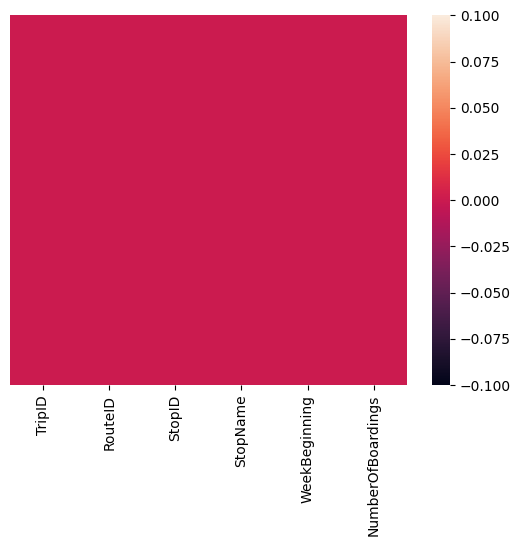

In [ ]:
# Drop duplicates

data = data.drop_duplicates()
sns.heatmap(data.isnull(), yticklabels = False)
print('\nCheck data types of Columns')
print(data.dtypes)


In [ ]:
# Handle Mixed data types

data['RouteID'] = pd.to_numeric(data['RouteID'], errors='coerce')
print('Handle Mixed datatypes')
print(data.dtypes)

Handle Mixed datatypes
TripID                 int64
RouteID              float64
StopID                 int64
StopName              object
WeekBeginning         object
NumberOfBoardings      int64
dtype: object


In [ ]:
# Handle Missing Values
data = data.dropna()
print('\nHandle Missing values')
print(data.shape)


Handle Missing values
(6414906, 6)


In [ ]:
# Convert WeekBeginning column to datetime format

data['WeekBeginning'] = pd.to_datetime(data['WeekBeginning'], errors='coerce')
print('\nConvert "WeekBeginning" column to datetime format')
print(data['WeekBeginning'].head())


Convert "WeekBeginning" column to datetime format
0   2013-06-30
1   2013-06-30
2   2013-06-30
3   2013-06-30
4   2013-06-30
Name: WeekBeginning, dtype: datetime64[ns]


In [ ]:
# Clean StopName

data['StopName'] = data['StopName'].str.strip()
print('\nClean "StopName" column')
print(data['StopName'].head())



Clean "StopName" column
0                  181 Cross Rd
1                  177 Cross Rd
2                  175 Cross Rd
3    Zone A Arndale Interchange
4                  178 Cross Rd
Name: StopName, dtype: object


In [ ]:
# Unique Values for each column in the DataFrame

print(data.nunique())
data.shape
data.columns
data.head(3)

TripID               23926
RouteID                323
StopID                6718
StopName              3840
WeekBeginning           54
NumberOfBoardings      381
dtype: int64


,TripID,RouteID,StopID,StopName,WeekBeginning,NumberOfBoardings
0,23631,100.0,14156,181 Cross Rd,2013-06-30,1
1,23631,100.0,14144,177 Cross Rd,2013-06-30,1
2,23632,100.0,14132,175 Cross Rd,2013-06-30,1


In [ ]:
# Count number of missing values

data.isnull().sum()

TripID               0
RouteID              0
StopID               0
StopName             0
WeekBeginning        0
NumberOfBoardings    0
dtype: int64

In [ ]:
# Different type of unique Data in the dataset

data['WeekBeginning'].unique()

<DatetimeArray>
['2013-06-30 00:00:00', '2013-07-07 00:00:00', '2013-07-14 00:00:00',
 '2013-07-21 00:00:00', '2013-07-28 00:00:00', '2013-08-04 00:00:00',
 '2013-08-11 00:00:00', '2013-08-18 00:00:00', '2013-08-25 00:00:00',
 '2013-09-01 00:00:00', '2013-09-08 00:00:00', '2013-09-15 00:00:00',
 '2013-09-22 00:00:00', '2013-09-29 00:00:00', '2013-10-06 00:00:00',
 '2013-10-13 00:00:00', '2013-10-20 00:00:00', '2013-10-27 00:00:00',
 '2013-11-03 00:00:00', '2013-11-10 00:00:00', '2013-11-17 00:00:00',
 '2013-11-24 00:00:00', '2013-12-01 00:00:00', '2013-12-08 00:00:00',
 '2013-12-15 00:00:00', '2013-12-22 00:00:00', '2013-12-29 00:00:00',
 '2014-01-05 00:00:00', '2014-01-12 00:00:00', '2014-01-19 00:00:00',
 '2014-01-26 00:00:00', '2014-02-02 00:00:00', '2014-02-09 00:00:00',
 '2014-02-16 00:00:00', '2014-02-23 00:00:00', '2014-03-02 00:00:00',
 '2014-03-09 00:00:00', '2014-03-16 00:00:00', '2014-03-23 00:00:00',
 '2014-03-30 00:00:00', '2014-04-06 00:00:00', '2014-04-13 00:00:00',
 '20

<Axes: xlabel='TripID'>

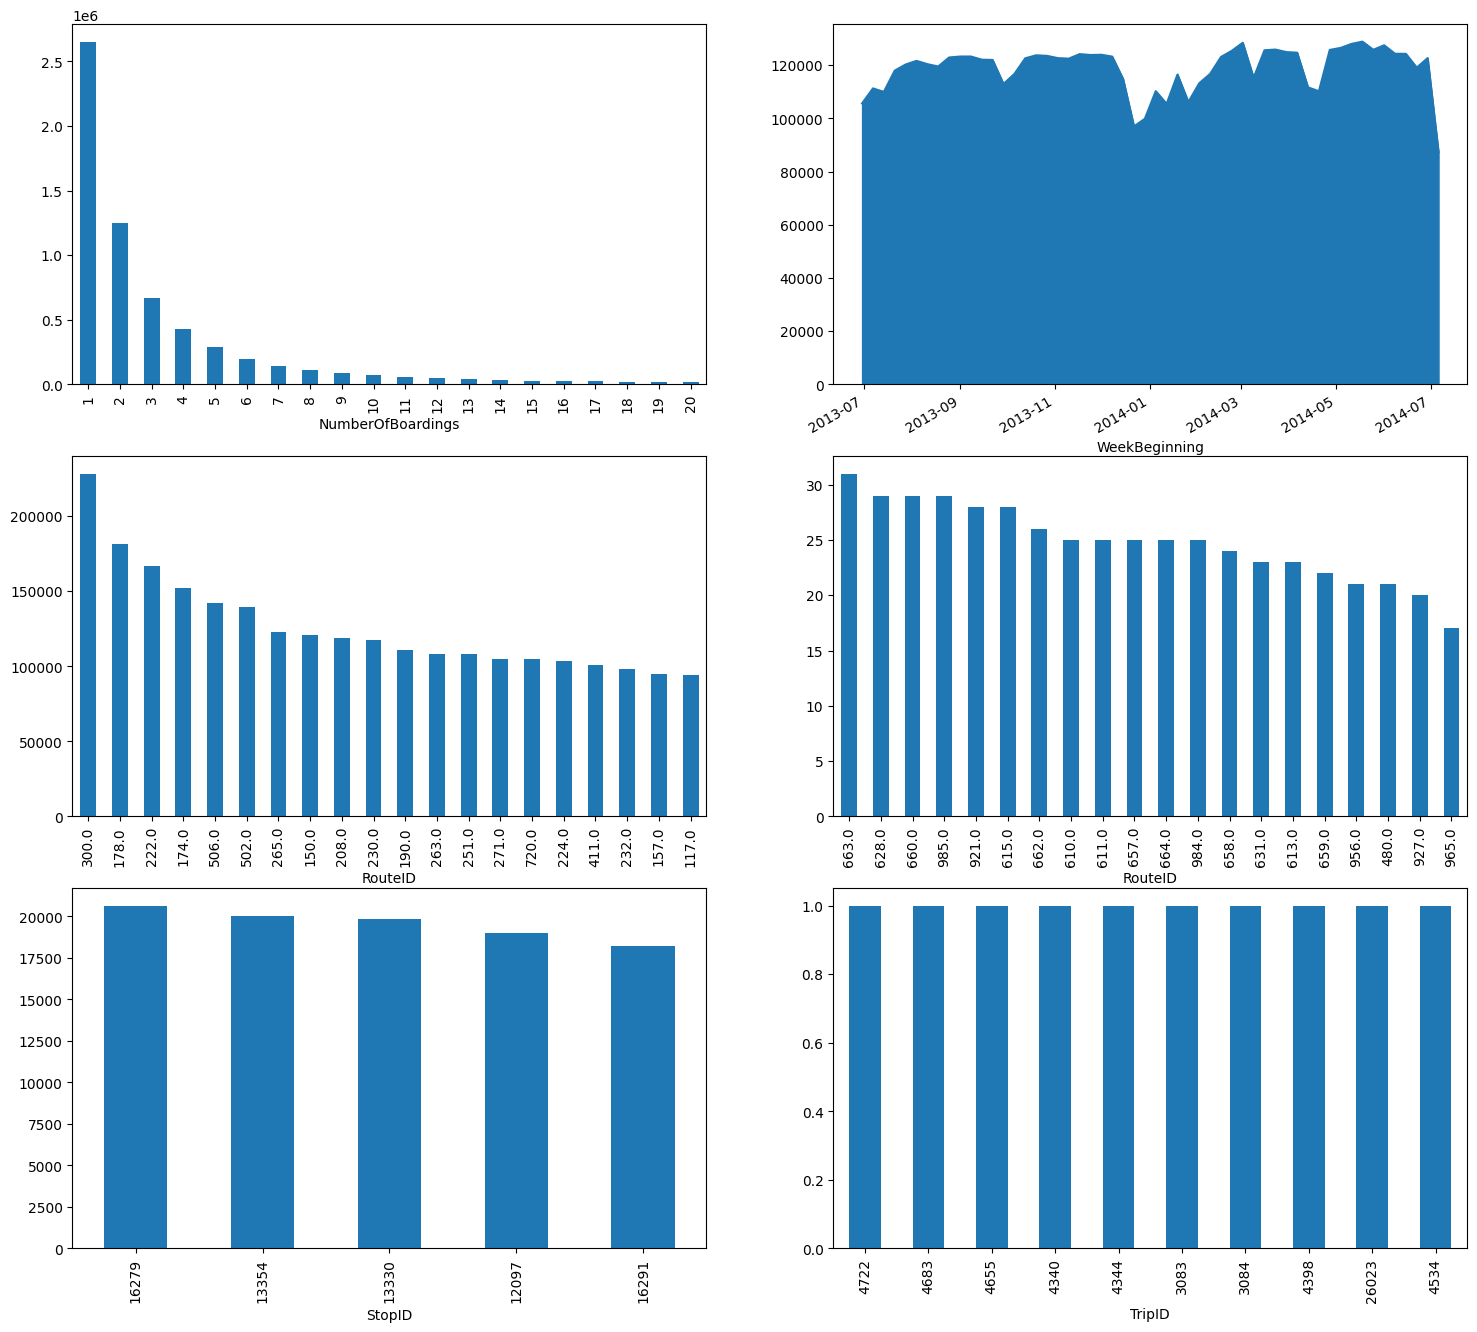

In [ ]:
# visualize the dataset
import matplotlib.pyplot as plt
fig,axrr=plt.subplots(3,2,figsize=(18,18))
data['NumberOfBoardings'].value_counts().sort_index().head(20).plot.bar(ax=axrr[0][0])
data['WeekBeginning'].value_counts().plot.area(ax=axrr[0][1])
data['RouteID'].value_counts().head(20).plot.bar(ax=axrr[1][0])
data['RouteID'].value_counts().tail(20).plot.bar(ax=axrr[1][1])
data['StopID'].value_counts().head(5).plot.bar(ax=axrr[2][0])
data['TripID'].value_counts().tail(10).plot.bar(ax=axrr[2][1])

In [ ]:
# Save the cleaned dataset to new CSV

data.to_csv('Cleaned_data.csv', index=False)
print('\nSave the Cleaned dataset to a new csv file')
print('Cleaned dataset Saved Successfully.')



Save the Cleaned dataset to a new csv file
Cleaned dataset Saved Successfully.


### Analysis

###### Objective:
In this notebook,I have explored how people are travelling from different stops in Adelaide Metropolitan area and managing the buses on each route according to the number of passenger commuting through the buses.

In [1]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import datetime
import os
from math import sqrt
import warnings

In [2]:
## For Multiple Output in single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Data Analytics/Cleaned_data.csv')
data.shape
data.head(10)

(6414906, 6)

,TripID,RouteID,StopID,StopName,WeekBeginning,NumberOfBoardings
0,23631,100.0,14156,181 Cross Rd,2013-06-30,1
1,23631,100.0,14144,177 Cross Rd,2013-06-30,1
2,23632,100.0,14132,175 Cross Rd,2013-06-30,1
3,23633,100.0,12266,Zone A Arndale Interchange,2013-06-30,2
4,23633,100.0,14147,178 Cross Rd,2013-06-30,1
5,23634,100.0,13907,9A Marion Rd,2013-06-30,1
6,23634,100.0,14132,175 Cross Rd,2013-06-30,1
7,23634,100.0,13335,9A Holbrooks Rd,2013-06-30,1
8,23634,100.0,13875,9 Marion Rd,2013-06-30,1
9,23634,100.0,13045,206 Holbrooks Rd,2013-06-30,1


In [4]:
out_geo = pd.read_csv('/content/drive/MyDrive/Data Analytics/output_geo.csv')
out_geo.shape
out_geo.head()

(4165, 10)

,accuracy,formatted_address,google_place_id,input_string,latitude,longitude,number_of_results,postcode,status,type
0,ROOFTOP,"181 Cross Rd, Westbourne Park SA 5041, Australia",ChIJKT7I9rbPsGoRVHMHkIy-Oyk,181 Cross Rd,-34.966656,138.592148,1,5041,OK,street_address
1,ROOFTOP,"177 Cross Rd, Westbourne Park SA 5041, Australia",ChIJ-VFZ87bPsGoRyfVgC5qbPpE,177 Cross Rd,-34.966607,138.592301,1,5041,OK,street_address
2,ROOFTOP,"175 Cross Rd, Westbourne Park SA 5041, Australia",ChIJIztlirbPsGoR38KRk76kPFI,175 Cross Rd,-34.966758,138.592715,1,5041,OK,street_address
3,GEOMETRIC_CENTER,"Zone A Arndale Interchange - South side, Kilke...",ChIJn0C1hCPGsGoRIWvCdhF1RIg,Zone A Arndale Interchange,-34.875160,138.551628,1,5009,OK,"bus_station,establishment,point_of_interest,tr..."
4,ROOFTOP,"178 Cross Rd, Malvern SA 5061, Australia",ChIJycNiylvOsGoRdhfq9GKnpq0,178 Cross Rd,-34.964960,138.611477,1,5061,OK,street_address


#### External Features

In [5]:
#DistanceFromCentre: Distance measure from the city centre
#For Calculating Distance between centre with other bus stops by using Longitude and Latitude
#we have used the Haversine formula

from math import sin, cos, sqrt, atan2, radians
def calc_dist(lat1,lon1):
    ## approximate radius of earth in km
    R = 6373.0
    dlon = radians(138.604801) - radians(lon1)
    dlat = radians(-34.921247) - radians(lat1)
    a = sin(dlat / 2)**2 + cos(radians(lat1)) * cos(radians(-34.921247)) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

In [6]:
out_geo['dist_from_centre'] = out_geo[['latitude','longitude']].apply(lambda x: calc_dist(*x), axis=1)

In [7]:
out_geo.head()

,accuracy,formatted_address,google_place_id,input_string,latitude,longitude,number_of_results,postcode,status,type,dist_from_centre
0,ROOFTOP,"181 Cross Rd, Westbourne Park SA 5041, Australia",ChIJKT7I9rbPsGoRVHMHkIy-Oyk,181 Cross Rd,-34.966656,138.592148,1,5041,OK,street_address,5.180961
1,ROOFTOP,"177 Cross Rd, Westbourne Park SA 5041, Australia",ChIJ-VFZ87bPsGoRyfVgC5qbPpE,177 Cross Rd,-34.966607,138.592301,1,5041,OK,street_address,5.172525
2,ROOFTOP,"175 Cross Rd, Westbourne Park SA 5041, Australia",ChIJIztlirbPsGoR38KRk76kPFI,175 Cross Rd,-34.966758,138.592715,1,5041,OK,street_address,5.180709
3,GEOMETRIC_CENTER,"Zone A Arndale Interchange - South side, Kilke...",ChIJn0C1hCPGsGoRIWvCdhF1RIg,Zone A Arndale Interchange,-34.875160,138.551628,1,5009,OK,"bus_station,establishment,point_of_interest,tr...",7.057549
4,ROOFTOP,"178 Cross Rd, Malvern SA 5061, Australia",ChIJycNiylvOsGoRdhfq9GKnpq0,178 Cross Rd,-34.964960,138.611477,1,5061,OK,street_address,4.900099


In [8]:
#exp_data = out_geo.head(10)
##Fill the missing values with mode
out_geo['type'].fillna('street_address',inplace=True)
out_geo['type'] = out_geo['type'].apply(lambda x: str(x).split(',')[-1])

In [9]:
out_geo['type'].unique()

array(['street_address', 'transit_station', 'premise', 'political',
       'school', 'route', 'intersection', 'point_of_interest',
       'subpremise', 'real_estate_agency', 'university', 'travel_agency',
       'restaurant', 'supermarket', 'store', 'post_office'], dtype=object)

In [10]:
data['WeekBeginning'] = pd.to_datetime(data['WeekBeginning']).dt.date
data['WeekBeginning'][1]

datetime.date(2013, 6, 30)

In [11]:
#Combine the Geolocation and main input file to get final Output File.
data= pd.merge(data,out_geo,how='left',left_on = 'StopName',right_on = 'input_string')
data.head(5)
data.shape

,TripID,RouteID,StopID,StopName,WeekBeginning,NumberOfBoardings,accuracy,formatted_address,google_place_id,input_string,latitude,longitude,number_of_results,postcode,status,type,dist_from_centre
0,23631,100.0,14156,181 Cross Rd,2013-06-30,1,ROOFTOP,"181 Cross Rd, Westbourne Park SA 5041, Australia",ChIJKT7I9rbPsGoRVHMHkIy-Oyk,181 Cross Rd,-34.966656,138.592148,1,5041,OK,street_address,5.180961
1,23631,100.0,14144,177 Cross Rd,2013-06-30,1,ROOFTOP,"177 Cross Rd, Westbourne Park SA 5041, Australia",ChIJ-VFZ87bPsGoRyfVgC5qbPpE,177 Cross Rd,-34.966607,138.592301,1,5041,OK,street_address,5.172525
2,23632,100.0,14132,175 Cross Rd,2013-06-30,1,ROOFTOP,"175 Cross Rd, Westbourne Park SA 5041, Australia",ChIJIztlirbPsGoR38KRk76kPFI,175 Cross Rd,-34.966758,138.592715,1,5041,OK,street_address,5.180709
3,23633,100.0,12266,Zone A Arndale Interchange,2013-06-30,2,GEOMETRIC_CENTER,"Zone A Arndale Interchange - South side, Kilke...",ChIJn0C1hCPGsGoRIWvCdhF1RIg,Zone A Arndale Interchange,-34.875160,138.551628,1,5009,OK,transit_station,7.057549
4,23633,100.0,14147,178 Cross Rd,2013-06-30,1,ROOFTOP,"178 Cross Rd, Malvern SA 5061, Australia",ChIJycNiylvOsGoRdhfq9GKnpq0,178 Cross Rd,-34.964960,138.611477,1,5061,OK,street_address,4.900099


(6414906, 17)

In [12]:
#Columns to keep for further analysis
col = ['TripID', 'RouteID', 'StopID', 'StopName', 'WeekBeginning','NumberOfBoardings',
      'latitude', 'longitude','postcode','type','dist_from_centre']
data = data[col]

 Aggregate the Data According to Weeks and Stop names

*  **NumberOfBoardings_sum** Number of Boardings within particular week for each Bus stop
*  **NumberOfBoardings_count** Number of times data is recorded within week
*  **NumberOfBoardings_max** Maximum number of boarding done at single time within week

In [13]:
grouped = data.groupby(['StopName','WeekBeginning','type'])
#grouped.head()

In [14]:
# st_week_grp1 = pd.DataFrame(data.groupby(['StopName','WeekBeginning','type']).agg({'NumberOfBoardings': ['sum', 'count']})).reset_index()
grouped = data.groupby(['StopName','WeekBeginning','type']).agg({'NumberOfBoardings': ['sum', 'count','max']})
grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]

In [15]:
grouped.head(10)
grouped.columns

NumberOfBoardings_sum  \
StopName    WeekBeginning type                                    
1 Anzac Hwy 2013-06-30    street_address                    520   
            2013-07-07    street_address                    416   
            2013-07-14    street_address                    420   
            2013-07-21    street_address                    370   
            2013-07-28    street_address                    466   
            2013-08-04    street_address                    365   
            2013-08-11    street_address                    564   
            2013-08-18    street_address                    391   
            2013-08-25    street_address                    482   
            2013-09-01    street_address                    718   

                                          NumberOfBoardings_count  \
StopName    WeekBeginning type                                      
1 Anzac Hwy 2013-06-30    street_address                      204   
            2013-07-07    street_address                      179   
            2013-07-14    street_address                      171   
            2013-07-21    street_address                      174   
            2013-07-28    street_address                      186   
            2013-08-04    street_address                      183   
            2013-08-11    street_address                      178   
            2013-08-18    street_address                      153   
            2013-08-25    street_address                      174   
            2013-09-01    street_address                      214   

                                          NumberOfBoardings_max  
StopName    WeekBeginning type                                   
1 Anzac Hwy 2013-06-30    street_address                     44  
            2013-07-07    street_address                     28  
            2013-07-14    street_address                     38  
            2013-07-21    street_address                     28  
            2013-07-28    street_address                     41  
            2013-08-04    street_address                     18  
            2013-08-11    street_address                     71  
            2013-08-18    street_address                     30  
            2013-08-25    street_address                     45  
            2013-09-01    street_address                     59

Index(['NumberOfBoardings_sum', 'NumberOfBoardings_count',
       'NumberOfBoardings_max'],
      dtype='object')

In [16]:
st_week_grp = pd.DataFrame(grouped).reset_index()
st_week_grp.shape
st_week_grp.head()

(183214, 6)

,StopName,WeekBeginning,type,NumberOfBoardings_sum,NumberOfBoardings_count,NumberOfBoardings_max
0,1 Anzac Hwy,2013-06-30,street_address,520,204,44
1,1 Anzac Hwy,2013-07-07,street_address,416,179,28
2,1 Anzac Hwy,2013-07-14,street_address,420,171,38
3,1 Anzac Hwy,2013-07-21,street_address,370,174,28
4,1 Anzac Hwy,2013-07-28,street_address,466,186,41


In [17]:
st_week_grp1 = pd.DataFrame(st_week_grp.groupby('StopName')["WeekBeginning"].count()).reset_index()
st_week_grp1.head()

,StopName,WeekBeginning
0,1 Anzac Hwy,54
1,1 Bartels Rd,1
2,1 Botanic Rd,54
3,1 Frome Rd,54
4,1 Fullarton Rd,54


In [18]:
#Gathering only the Stop Name which having all 54 weeks of Dat
aa = list(st_week_grp1[st_week_grp1['WeekBeginning'] == 54]['StopName'])
aa[1:10]

['1 Botanic Rd',
 '1 Frome Rd',
 '1 Fullarton Rd',
 '1 George St',
 '1 Glen Osmond Rd',
 '1 Henley Beach Rd',
 '1 Kensington Rd',
 '1 King William Rd',
 '1 Port Rd']

In [19]:
bb = st_week_grp[st_week_grp['StopName'].isin(aa)]
bb.head()
bb.shape

type(bb)

,StopName,WeekBeginning,type,NumberOfBoardings_sum,NumberOfBoardings_count,NumberOfBoardings_max
0,1 Anzac Hwy,2013-06-30,street_address,520,204,44
1,1 Anzac Hwy,2013-07-07,street_address,416,179,28
2,1 Anzac Hwy,2013-07-14,street_address,420,171,38
3,1 Anzac Hwy,2013-07-21,street_address,370,174,28
4,1 Anzac Hwy,2013-07-28,street_address,466,186,41


(144396, 6)

pandas.core.frame.DataFrame

In [20]:
#removing the stoppage which are not having the data of whole 54 weeks
new_data = data[data['StopName'].isin(aa)]
new_data.shape
print("data without stopage removing: ", data.shape)
print("data, after removing stoppage not having the data of whole 54 weeks: ", new_data.shape)

(6182298, 11)

data without stopage removing:  (6414906, 11)
data, after removing stoppage not having the data of whole 54 weeks:  (6182298, 11)


In [21]:
new_data.head(2)
filtered_data = new_data[new_data['dist_from_centre'] <= 100]
filtered_data.shape

,TripID,RouteID,StopID,StopName,WeekBeginning,NumberOfBoardings,latitude,longitude,postcode,type,dist_from_centre
0,23631,100.0,14156,181 Cross Rd,2013-06-30,1,-34.966656,138.592148,5041,street_address,5.180961
1,23631,100.0,14144,177 Cross Rd,2013-06-30,1,-34.966607,138.592301,5041,street_address,5.172525


(6036504, 11)

In [22]:
#No of boarding for each stopage in all weeks
#bb["StopName"].groupby(NumberOfBoardings_sum)
stopageName_with_boarding = bb.groupby(['StopName']).agg({'NumberOfBoardings_sum': ['sum']})

#stopageName_with_boarding.columns = ["_".join(x) for x in stopageName_with_boarding.columns.ravel()]
#stopageName_with_boarding.head()
stopageName_with_boarding = pd.DataFrame(stopageName_with_boarding.reset_index())

In [23]:
#type(stopageName_with_boarding)
stopageName_with_boarding.columns = ["StopName", "Total_boarding_on_the_stopage"]
#stopageName_with_boarding.shape
stopageName_with_boarding.head()

,StopName,Total_boarding_on_the_stopage
0,1 Anzac Hwy,23389
1,1 Botanic Rd,5894
2,1 Frome Rd,67458
3,1 Fullarton Rd,565
4,1 George St,5078


#### Data Exploration

In [24]:
data.nunique()
#data.isnull().sum()
#data['WeekBeginning'].unique()

TripID               23926
RouteID                323
StopID                6718
StopName              3840
WeekBeginning           54
NumberOfBoardings      381
latitude              2790
longitude             2771
postcode               199
type                    15
dist_from_centre      2794
dtype: int64

#### Data Visualization

Text(0.5, 1.0, 'No of Boardings')

<Axes: title={'center': 'No of Boardings'}, xlabel='NumberOfBoardings'>

Text(0.5, 1.0, 'WeekBeginning')

<Axes: title={'center': 'WeekBeginning'}, xlabel='WeekBeginning'>

Text(0.5, 1.0, 'most Busiest Route')

<Axes: title={'center': 'most Busiest Route'}, xlabel='RouteID'>

Text(0.5, 1.0, 'least Busiest Route')

<Axes: title={'center': 'least Busiest Route'}, xlabel='RouteID'>

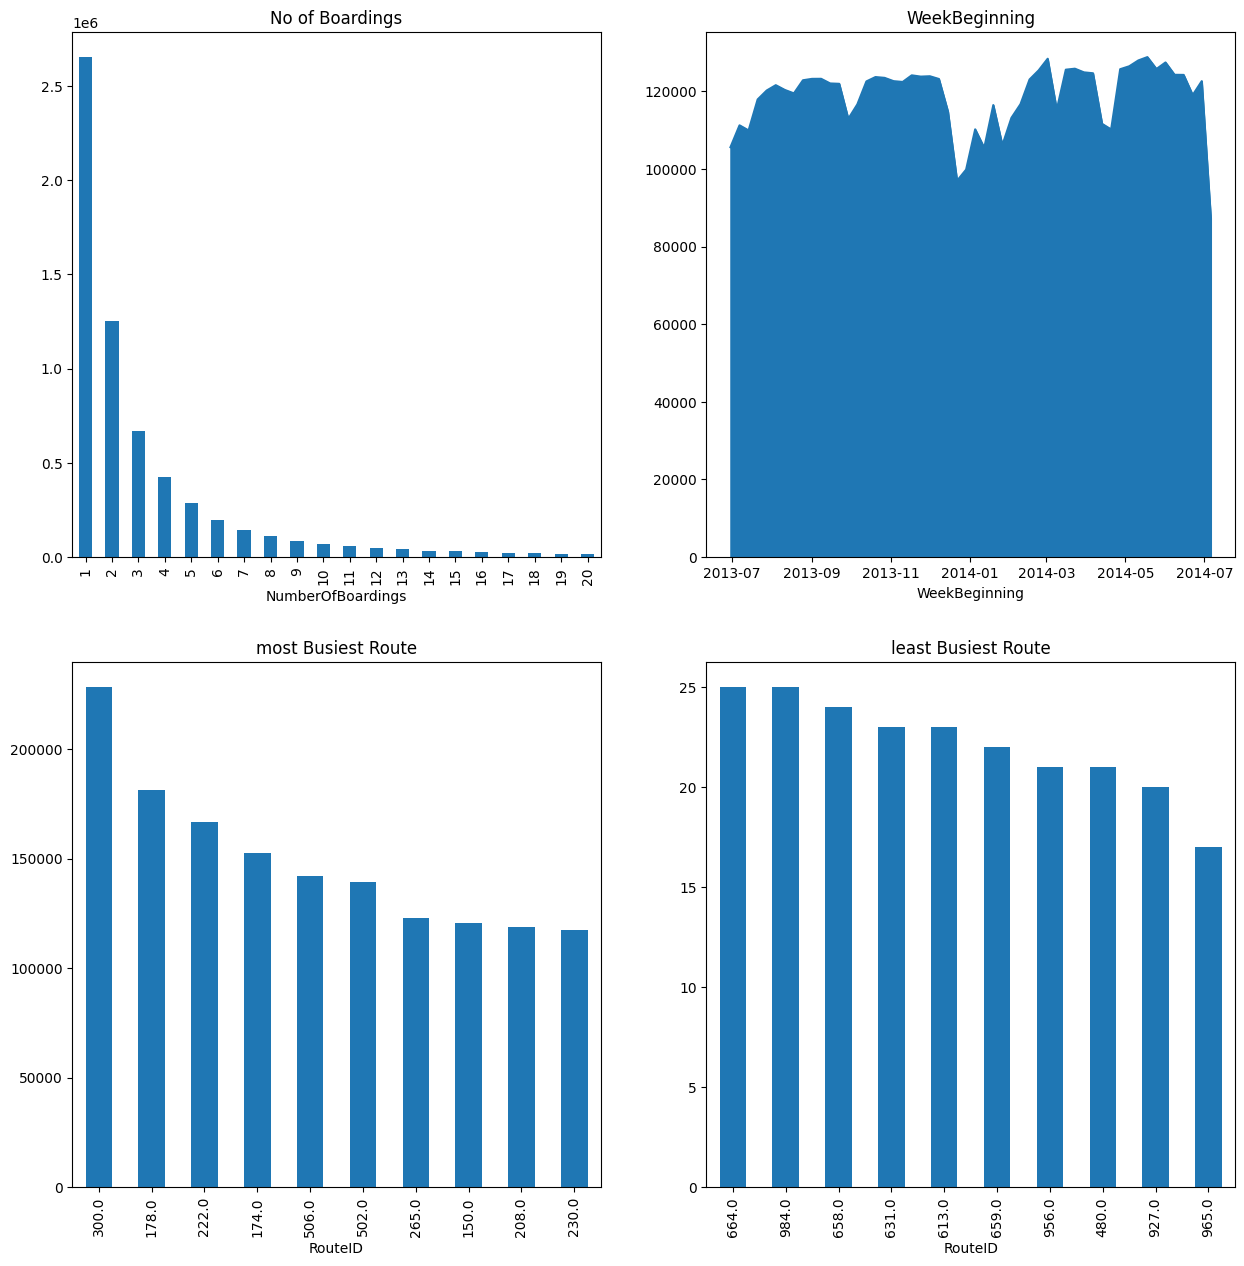

In [25]:
##can assign the each chart to one axes at a time
fig,axrr=plt.subplots(2,2,figsize=(15,15))

ax=axrr[0][0]
ax.set_title("No of Boardings")
data['NumberOfBoardings'].value_counts().sort_index().head(20).plot.bar(ax=axrr[0][0])

ax=axrr[0][1]
ax.set_title("WeekBeginning")
data['WeekBeginning'].value_counts().plot.area(ax=axrr[0][1])

ax=axrr[1][0]
ax.set_title("most Busiest Route")
data['RouteID'].value_counts().head(10).plot.bar(ax=axrr[1][0])

ax=axrr[1][1]
ax.set_title("least Busiest Route")
data['RouteID'].value_counts().tail(10).plot.bar(ax=axrr[1][1])

In [26]:
stopageName_with_boarding = stopageName_with_boarding.sort_values('Total_boarding_on_the_stopage', ascending = False)
#stopage with most no of boarding
stopageName_with_boarding.head(10)

,StopName,Total_boarding_on_the_stopage
2563,X2 King William St,392261
2472,D1 King William St,304767
2505,I2 North Tce,235130
2559,X1 King William St,224486
2663,Zone F Paradise Interchange,211899
2493,G3 Grenfell St,201599
2468,C3 King William St,192148
2550,W1 North Tce,189388
2481,E2 Currie St,170410
2478,E1 Currie St,165886


In [28]:
#stopage with least no of boarding
stopageName_with_boarding.tail(10)

,StopName,Total_boarding_on_the_stopage
1522,46 Main South Rd,312
1820,55 Military Rd,300
1753,53 Hub Dr,280
1287,39D Glenloth Dr,266
1290,39F Williamson Rd,256
1738,52A States Rd,247
932,31 Glenroy St,220
423,19 Gilles Rd,215
1257,39 Kesters Rd,197
228,145 The Esplanade,165


Text(0.5, 1.0, 'most busiest stopage')

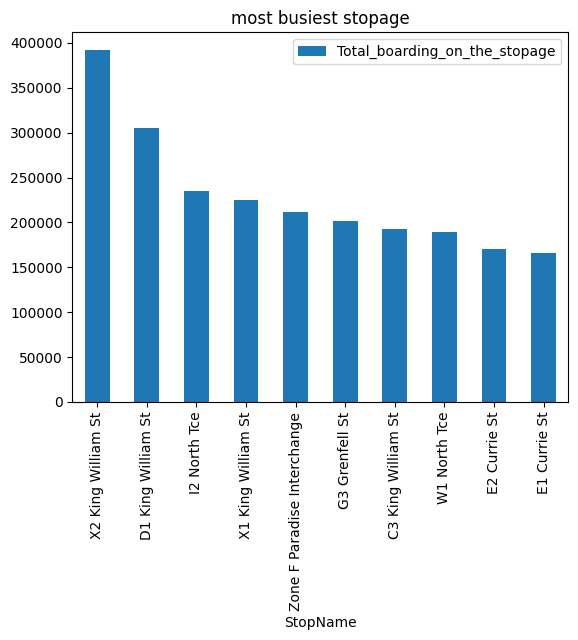

In [29]:
ax = stopageName_with_boarding.head(10).plot.bar(x='StopName', y='Total_boarding_on_the_stopage', rot=90)
ax.set_title("most busiest stopage")

Text(0.5, 1.0, 'least busiest stopage')

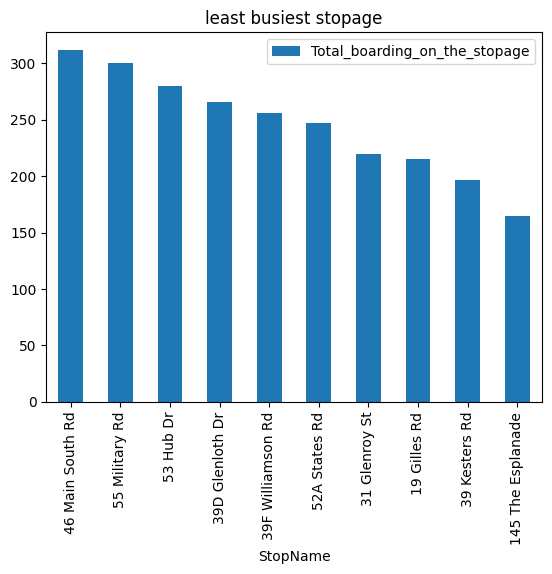

In [30]:
ax = stopageName_with_boarding.tail(10).plot.bar(x='StopName', y='Total_boarding_on_the_stopage', rot=90)
ax.set_title("least busiest stopage")

In [31]:
data['WeekBeginning'].value_counts().mean()

118794.55555555556

In [32]:
# data['dist_from_centre'].nunique()
bb_grp = data.groupby(['dist_from_centre']).agg({'NumberOfBoardings': ['sum']}).reset_index()
bb_grp.columns = bb_grp.columns.get_level_values(0)
bb_grp.head()
bb_grp.columns
bb_grp.tail()

,dist_from_centre,NumberOfBoardings
0,0.000018,1100379
1,0.131368,45597
2,0.309089,201599
3,0.314937,507740
4,0.326005,124


Index(['dist_from_centre', 'NumberOfBoardings'], dtype='object')

,dist_from_centre,NumberOfBoardings
2789,16137.104412,370
2790,16643.170375,42
2791,16643.501617,203
2792,16790.222352,31
2793,17237.137089,1203


In [33]:
import plotly.graph_objs as go
from plotly.offline import iplot

trace0 = go.Scatter(
    x = bb_grp['dist_from_centre'],
    y = bb_grp['NumberOfBoardings'],mode = 'lines+markers',name = 'X2 King William St')

data1 = [trace0]
layout = dict(title = 'Distance Vs Number of boarding',
              xaxis = dict(title = 'Distance from centre'),
              yaxis = dict(title = 'Number of Boardings'))
fig = dict(data=data1, layout=layout)
iplot(fig)

In [34]:
#clustering Technique// based on the distance from city centre

x = data["dist_from_centre"]
distance_10 = []
distance_10_50 = []
distance_50_100 = []
#distance_100_ = []
distance_100_more = []
total = 0
outlier = []
outlier_ = 0
for i in x:
    if(i<=10):
        distance_10.append(i)
        total += 1
    elif(i<=50):
        distance_10_50.append(i)
        total += 1
    elif(i<=100):
        distance_50_100.append(i)
        total += 1
    #elif(i>100 and i< 2000):
        #distance_100_more.append(i)
        #total += 1
    #elif(i>2000):
        #outlier.append(i)
        #outlier_ += 1

In [35]:
print(outlier_)

0


In [36]:
y = len(distance_10)+len(distance_10_50)+len(distance_50_100)
#+len(distance_100_more)
#print(y)
#print(total)

In [37]:
print(total)
print("passangers, boarding the buses in the radious of 10Km from the city center = ", (len(distance_10)/total)*100)
print("passanger, boarding the buses from the distance of 10Km to 50Km from the city center = ", (len(distance_10_50)/total)*100)
print("passanger, boarding the buses from the distance of 50Km to 100 from the city center = ", (len(distance_50_100)/total)*100)
#print("passanger, boarding the buses from the distance of 100Km and more from the city center = ", (len(distance_100_more)/total)*100)

6252496
passangers, boarding the buses in the radious of 10Km from the city center =  58.73172889674779
passanger, boarding the buses from the distance of 10Km to 50Km from the city center =  38.78959698654745
passanger, boarding the buses from the distance of 50Km to 100 from the city center =  2.478674116704753


In [38]:
#busiest route on weekly basis
#data.head(10)
# st_week_grp1 = pd.DataFrame(data.groupby(['StopName','WeekBeginning','type']).agg({'NumberOfBoardings': ['sum', 'count']})).reset_index()
grouped_route = data.groupby(['RouteID']).agg({'NumberOfBoardings': ['sum', 'max']})
grouped_route.columns = ["_".join(x) for x in grouped_route.columns.ravel()]